In [1]:
psrname='J1600-3053'

In [2]:
script_dir='/media/root1/3PAR/sdandapat/work_dir'
work_dir='/media/root1/3PAR/sdandapat/'

In [3]:
spna_dir=work_dir+'posteriors/EPTA-ONLY/SPNA/'+psrname+'/'
spnta_dir=work_dir+'posteriors/EPTA-ONLY/SPNTA/'+psrname+'/results/'

In [4]:
import os
with os.scandir(spna_dir) as entries:
        for entry in entries:
            spna_dir=spna_dir+entry.name

In [5]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append(script_dir)
from diff_chain import  Diff_chain_shift

2023-04-16 05:45:37.296245: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 05:45:37.340674: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 05:45:37.341811: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 05:45:38.056270: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
par_epta_spna=pd.read_csv('/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNA/J1600-3053/TM_WN_DM26_SV138/ptmcmc/pars.txt', header = None)
lspn=len(par_epta_spna)
par_epta_spna

,0
0,J1600-3053_EFF.P200.1380_efac
1,J1600-3053_EFF.P200.1380_log10_tnequad
2,J1600-3053_EFF.P217.1380_efac
3,J1600-3053_EFF.P217.1380_log10_tnequad
4,J1600-3053_EFF.S110.2487_efac
5,J1600-3053_EFF.S110.2487_log10_tnequad
6,J1600-3053_JBO.ROACH.1520_efac
7,J1600-3053_JBO.ROACH.1520_log10_tnequad
8,J1600-3053_LEAP.1396_efac
9,J1600-3053_LEAP.1396_log10_tnequad


In [7]:
epta_spna_1=np.loadtxt('/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNA/J1600-3053/TM_WN_DM26_SV138/ptmcmc/chain_1.txt',usecols=(lspn-1,lspn-2,-3))

In [8]:
par_epta_spnta=pd.read_csv(spnta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
lspnt=len(par_epta_spnta)
par_epta_spnta

,0
0,RAJ \alpha
1,DECJ \delta
2,F0 \nu
3,F1 \dot{\nu}
4,DM
5,DM1
6,DM2
7,PMRA \mu_\alpha
8,PMDEC \mu_\delta
9,PX \pi


In [9]:
epta_spnta_1=np.loadtxt(spnta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat',usecols=(lspnt-4,lspnt-3,-1))

In [10]:
epta_spna_1.T[0]=epta_spna_1.T[0]+1.64

In [11]:
spna_arr_dm=epta_spna_1.T[0:2];spnta_arr_dm=epta_spnta_1.T[0:2]

In [12]:
loglike_spna=epta_spna_1.T[-1];loglike_spnta=epta_spnta_1.T[-1]

# Tension considering dm noise only

In [13]:
names_dm = ['gamma_DM','logA_DM']
labels_dm=['\gamma_{DM}','\log A_{DM}']
del_dm=['delta_gamma_DM','delta_logA_DM']

In [14]:
spna_dm=MCSamples(samples=np.array(spna_arr_dm).transpose(),loglikes=loglike_spna,names=names_dm,labels=labels_dm,label='SPNA')
spnta_dm=MCSamples(samples=np.array(spnta_arr_dm).transpose(),loglikes=loglike_spnta,names = names_dm,labels=labels_dm,label='SPNTA \n'+psrname)

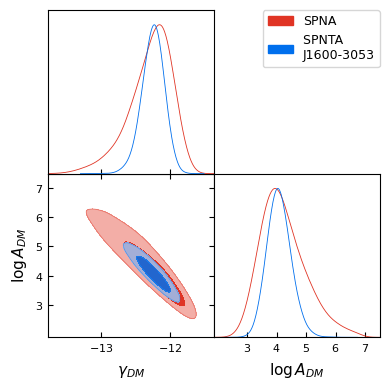

In [15]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna_dm,spnta_dm], filled=True)
#plt.savefig(psrname+'_R_DM_EPTA_dm.png',dpi=300)
plt.show()

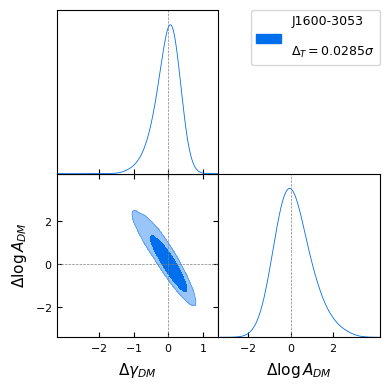

In [16]:
%matplotlib inline
diff_chain_dm, nsig_dm, chi_2_dm, D_B_dm=Diff_chain_shift(spna_dm,spnta_dm)
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_dm))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colodm_text=True)
plt.savefig(psrname+'_diff_EPTA_dm.png',dpi=300)

In [17]:
def plot_diff_chain(A1,A2,lims=None):
    diff_chain, nsig, shift_lower, shift_upper=Diff_chain_shift(A1,A2)
    
    shift_probability=utilities.from_sigma_to_confidence(nsig)
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_dm[0], param2=del_dm[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' vs '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.3f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    #plt.savefig('diff_'+psrname+A1.getLabel()+'_'+A2.getLabel()+'.png',dpi=300)
    
    return diff_chain,shift_probability
    

(<getdist.mcsamples.MCSamples at 0x7fcd780f2250>, 0.022751375687843915)

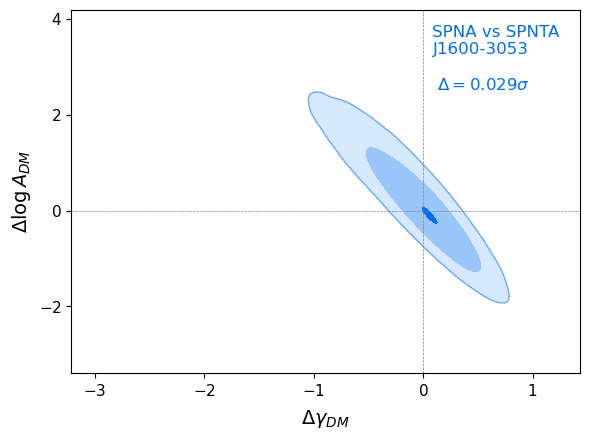

In [18]:
plot_diff_chain(spna_dm,spnta_dm)